Loading Data & Libraries

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# set style of visualization
sns.set_style("darkgrid")
sns.set_palette("RdBu")

In [2]:
# read data set

from google.colab import files
uploaded = files.upload()

Saving CoffeeShopSales.xlsx to CoffeeShopSales.xlsx


read the dataset

In [3]:
df = pd.read_excel("CoffeeShopSales.xlsx")

In [4]:
# see top 5 rows

df.head()

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail
0,1,2023-01-01,07:06:11,2,5,Lower Manhattan,32,3.0,Coffee,Gourmet brewed coffee,Ethiopia Rg
1,2,2023-01-01,07:08:56,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg
2,3,2023-01-01,07:14:04,2,5,Lower Manhattan,59,4.5,Drinking Chocolate,Hot chocolate,Dark chocolate Lg
3,4,2023-01-01,07:20:24,1,5,Lower Manhattan,22,2.0,Coffee,Drip coffee,Our Old Time Diner Blend Sm
4,5,2023-01-01,07:22:41,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg


In [5]:
# see number of rows and columns

df.shape

(149116, 11)

In [6]:
# check missing values

df.isna().sum()

,0
transaction_id,0
transaction_date,0
transaction_time,0
transaction_qty,0
store_id,0
store_location,0
product_id,0
unit_price,0
product_category,0
product_type,0


In [7]:
# see quick info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149116 entries, 0 to 149115
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   transaction_id    149116 non-null  int64         
 1   transaction_date  149116 non-null  datetime64[ns]
 2   transaction_time  149116 non-null  object        
 3   transaction_qty   149116 non-null  int64         
 4   store_id          149116 non-null  int64         
 5   store_location    149116 non-null  object        
 6   product_id        149116 non-null  int64         
 7   unit_price        149116 non-null  float64       
 8   product_category  149116 non-null  object        
 9   product_type      149116 non-null  object        
 10  product_detail    149116 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(4), object(5)
memory usage: 12.5+ MB


In [8]:
# check duplicated rows

df.duplicated().any()

False

In [9]:
# see unique values in each column

# 1- create new data frame with number of unique value in each column
columnValue = df.nunique().reset_index()

# 2- rename column name
columnValue.rename(columns = {"index" : "Column _name", 0 : "Uniue values"}, inplace = True)

# 3- see columns and number of unique values of each
columnValue

,Column _name,Uniue values
0,transaction_id,149116
1,transaction_date,181
2,transaction_time,25762
3,transaction_qty,6
4,store_id,3
5,store_location,3
6,product_id,80
7,unit_price,41
8,product_category,9
9,product_type,29


In [10]:
# See quick info of numeric data

df.describe()

,transaction_id,transaction_date,transaction_qty,store_id,product_id,unit_price
count,149116.000000,149116,149116.000000,149116.000000,149116.000000,149116.000000
mean,74737.371872,2023-04-15 11:50:32.173609984,1.438276,5.342063,47.918607,3.382219
min,1.000000,2023-01-01 00:00:00,1.000000,3.000000,1.000000,0.800000
25%,37335.750000,2023-03-06 00:00:00,1.000000,3.000000,33.000000,2.500000
50%,74727.500000,2023-04-24 00:00:00,1.000000,5.000000,47.000000,3.000000
75%,112094.250000,2023-05-30 00:00:00,2.000000,8.000000,60.000000,3.750000
max,149456.000000,2023-06-30 00:00:00,8.000000,8.000000,87.000000,45.000000
std,43153.600016,NaN,0.542509,2.074241,17.930020,2.658723


In [11]:
# see quick info of categorical data

df.describe(include = object)

,transaction_time,store_location,product_category,product_type,product_detail
count,149116,149116,149116,149116,149116
unique,25762,3,9,29,80
top,09:31:15,Hell's Kitchen,Coffee,Brewed Chai tea,Chocolate Croissant
freq,41,50735,58416,17183,3076


In [12]:
# drop some columns such as "product_id", "transaction_id" and "store_id"

df.drop(columns = ["transaction_id", "store_id", "product_id"], inplace = True)

**Univariate Analysis & Visualizations**

In [13]:
# create function to visualized categorical column using count plot

def count_plot(x_axis = None, y_axis = None, hue = None, rotation = 0, top = None):

    if x_axis: # if we neet to visualized in x-axis
        order = df[x_axis].value_counts().iloc[:top].index

    else : # if we neet to visualized in y-axis
        order = df[y_axis].value_counts().iloc[:top].index

    graph = sns.countplot(x = x_axis, y = y_axis, data = df, hue = hue, order = order, palette = "RdBu")
    for container in graph.containers:
        graph.bar_label(container)


    plt.xticks(rotation = rotation)
    plt.show()

In [14]:
# create function that visualized categorical column using pie plot

def pie_plot(column_name, explodeIndex = None):

    # Create explode list with zeros of size equal to the number of unique values
    explodeList = [0] * df[column_name].nunique()

    # Check and set explodeIndex value
    if explodeIndex is not None:
        explodeList[explodeIndex] = 0.1

    # Create pie plot
    plt.pie(df[column_name].value_counts(), labels = df[column_name].value_counts().index, shadow = True, autopct = "%1.1f%%",  explode = explodeList)
    plt.show()

Discovering transaction_date column¶


In [15]:
# see unique value

df["transaction_date"].unique()[:25]

<DatetimeArray>
['2023-01-01 00:00:00', '2023-01-02 00:00:00', '2023-01-03 00:00:00',
 '2023-01-04 00:00:00', '2023-01-05 00:00:00', '2023-01-06 00:00:00',
 '2023-01-07 00:00:00', '2023-01-08 00:00:00', '2023-01-09 00:00:00',
 '2023-01-10 00:00:00', '2023-01-11 00:00:00', '2023-01-12 00:00:00',
 '2023-01-13 00:00:00', '2023-01-14 00:00:00', '2023-01-15 00:00:00',
 '2023-01-16 00:00:00', '2023-01-17 00:00:00', '2023-01-18 00:00:00',
 '2023-01-19 00:00:00', '2023-01-20 00:00:00', '2023-01-21 00:00:00',
 '2023-01-22 00:00:00', '2023-01-23 00:00:00', '2023-01-24 00:00:00',
 '2023-01-25 00:00:00']
Length: 25, dtype: datetime64[ns]

Extract some information such as year , month and day

In [16]:
# add new column year
df["year"] = df["transaction_date"].dt.year

# add new column month
df["month"] = df["transaction_date"].dt.month_name()

# add new column day
df["day"] = df["transaction_date"].dt.day_name()

Discovering this columns

In [17]:
# see unique values of year column

df["year"].unique()

array([2023], dtype=int32)

Sales exclusively from 2023.

In [18]:
# see unique values of month column

df["month"].unique()

array(['January', 'February', 'March', 'April', 'May', 'June'],
      dtype=object)

<ipython-input-13-a877a5697b23>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  graph = sns.countplot(x = x_axis, y = y_axis, data = df, hue = hue, order = order, palette = "RdBu")


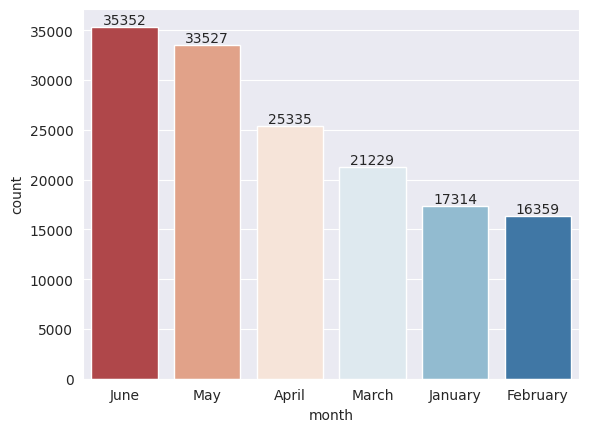

In [19]:
# see number of transaction in each month

count_plot(x_axis = "month") # call function i create it in cell 12

Most sales within a six-month period

In [20]:
df["day"].unique()

array(['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday',
       'Saturday'], dtype=object)

<ipython-input-13-a877a5697b23>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  graph = sns.countplot(x = x_axis, y = y_axis, data = df, hue = hue, order = order, palette = "RdBu")


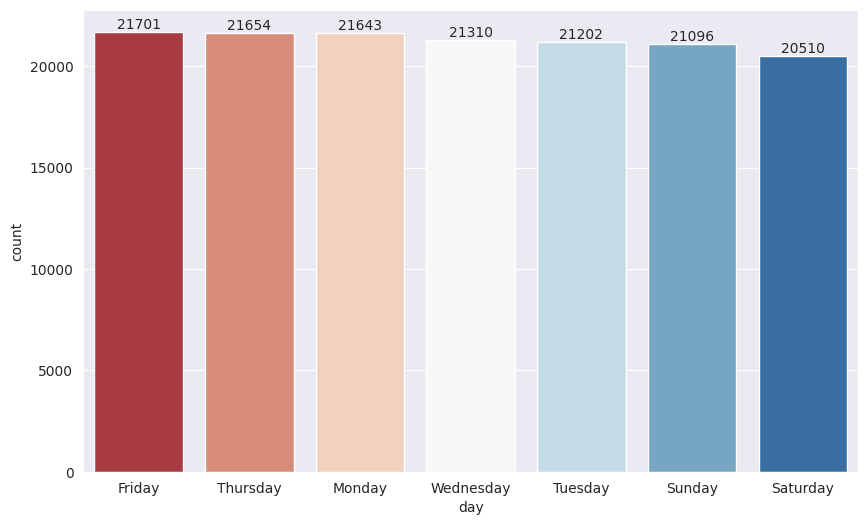

In [21]:
# see top 5 day of transaction

# set figure size
plt.figure(figsize = (10,6))

# call function i create it in cell 12
count_plot(x_axis = "day")

In [22]:
# now i will drop  "transaction_date" column

df.drop(columns = "transaction_date", inplace = True)

Discovering transaction_time column

In [23]:
# see unique values

df["transaction_time"].unique()[:50]

array([datetime.time(7, 6, 11), datetime.time(7, 8, 56),
       datetime.time(7, 14, 4), datetime.time(7, 20, 24),
       datetime.time(7, 22, 41), datetime.time(7, 25, 49),
       datetime.time(7, 33, 34), datetime.time(7, 39, 13),
       datetime.time(7, 39, 34), datetime.time(7, 43, 5),
       datetime.time(7, 44, 35), datetime.time(7, 45, 51),
       datetime.time(7, 48, 19), datetime.time(7, 52, 36),
       datetime.time(7, 59, 58), datetime.time(8, 0, 18),
       datetime.time(8, 0, 39), datetime.time(8, 11, 45),
       datetime.time(8, 17, 27), datetime.time(8, 24, 26),
       datetime.time(8, 29, 38), datetime.time(8, 31, 23),
       datetime.time(8, 33, 8), datetime.time(8, 35, 3),
       datetime.time(8, 41, 57), datetime.time(8, 52, 3),
       datetime.time(8, 52, 32), datetime.time(8, 54, 33),
       datetime.time(8, 56, 27), datetime.time(8, 57, 46),
       datetime.time(8, 58, 55), datetime.time(9, 0, 12),
       datetime.time(9, 0, 24), datetime.time(9, 7, 13),
       da

Extract some information such as hour

In [24]:
# add new column hour

df["hour"] = df["transaction_time"].apply(lambda x : x.hour)

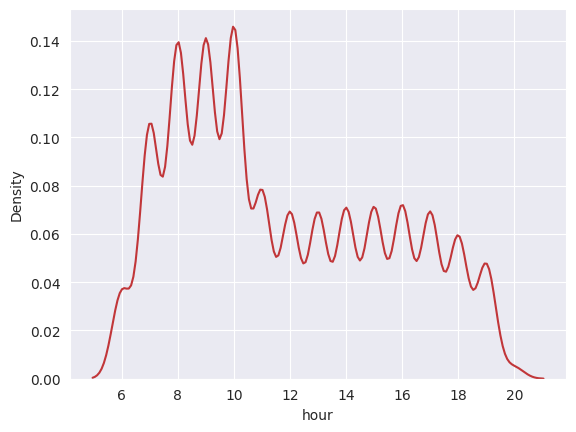

In [25]:
# see distribution

sns.kdeplot(df["hour"])
plt.show()

Most sales were from 8 am to 11 pm

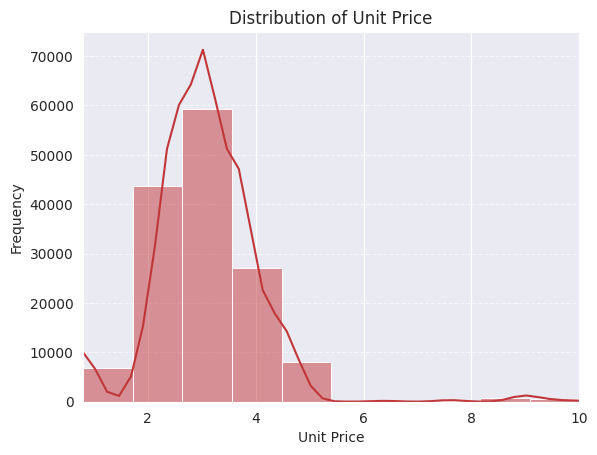

In [37]:
# Import necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Custom histogram for unit_price
sns.histplot(data=df, x="unit_price", kde=True, bins=10, binrange=(0.8, 10))  # Specify bin range to focus on relevant prices
plt.title("Distribution of Unit Price")
plt.xlabel("Unit Price")
plt.ylabel("Frequency")
plt.xlim(0.8, 10)  # Set limits for better focus
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add a grid for readability
plt.show()


In [ ]:
# now i will drop  "transaction_date" column

df.drop(columns = "transaction_time", inplace = True)

Discovering transaction_qty column

In [ ]:
# see unique values

df["transaction_qty"].unique()

array([2, 1, 3, 4, 8, 6])

<ipython-input-21-4f98b90b6b5d>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  graph = sns.countplot(x = x_axis, y = y_axis, data = df, hue = hue, order = order, palette = "RdBu")


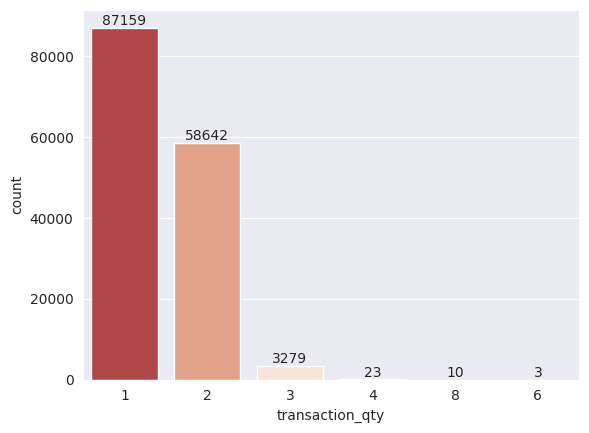

In [ ]:
# see number of sales quantity

count_plot(x_axis = "transaction_qty") # call function i create it in cell 12

Most sales were singles followed by 2 lots

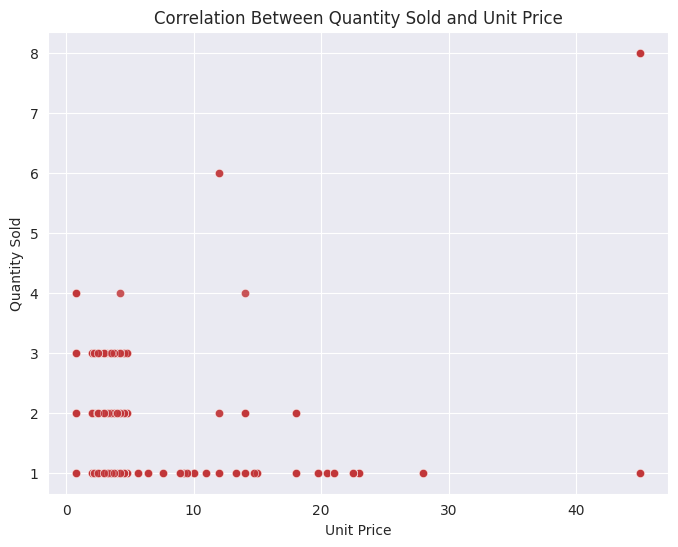

Correlation coefficient between unit price and quantity sold: -0.12


In [42]:
# Scatter plot to examine the correlation between quantity sold and unit price
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='unit_price', y='transaction_qty', alpha=0.6)
plt.title('Correlation Between Quantity Sold and Unit Price')
plt.xlabel('Unit Price')
plt.ylabel('Quantity Sold')
plt.grid(True)
plt.show()

# Calculate and display the correlation coefficient
correlation = df['unit_price'].corr(df['transaction_qty'])
print(f"Correlation coefficient between unit price and quantity sold: {correlation:.2f}")

Discovering store_location column

In [ ]:
# see unique values

df["store_location"].unique()

array(['Lower Manhattan', "Hell's Kitchen", 'Astoria'], dtype=object)

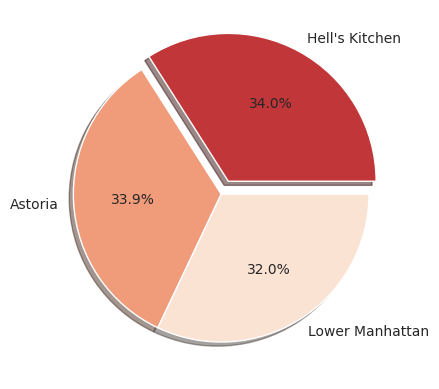

In [ ]:
# see number of sales in each store

pie_plot(column_name = "store_location", explodeIndex = 0)

The sales rates of the three stores were similar, with the most significant difference observed at the Hell's Kitchen store

Discovering unit_price column

In [ ]:
# see unique values

df["unit_price"].unique()

array([ 3.  ,  3.1 ,  4.5 ,  2.  ,  4.25,  3.5 ,  2.55,  3.75,  2.5 ,
        4.75,  3.25,  4.  ,  2.2 ,  2.45,  0.8 ,  8.95, 21.  , 28.  ,
        6.4 , 19.75, 12.  , 18.  ,  9.5 , 10.  , 20.45,  9.25, 22.5 ,
       14.75,  7.6 , 14.  , 10.95, 13.33, 15.  ,  4.38,  4.06,  5.63,
        4.69, 45.  , 23.  ,  2.1 ,  2.65])

<Axes: ylabel='unit_price'>

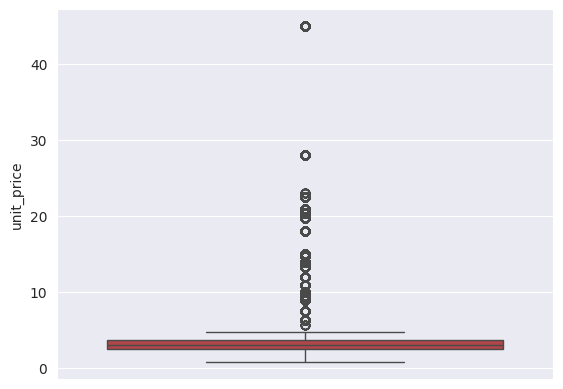

In [ ]:
# see 5 number summary to check outliers

sns.boxplot(y = "unit_price", data = df)

One might assume the presence of outliers, but such variations are expected in different types of coffee

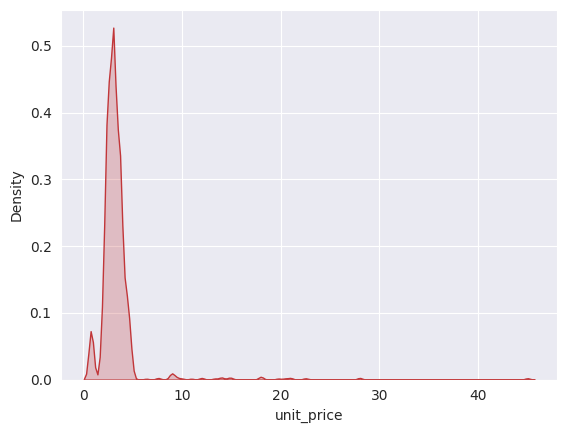

In [ ]:
# see distribution

sns.kdeplot(x = df["unit_price"], fill = True)
plt.show()

We can see :

Price distribution is positively skewed, We understand from this that most Coffee have lower prices,while a few Coffee have higher prices

Discovering product_category column

In [ ]:
# see unique values

df["product_category"].unique()

array(['Coffee', 'Tea', 'Drinking Chocolate', 'Bakery', 'Flavours',
       'Loose Tea', 'Coffee beans', 'Packaged Chocolate', 'Branded'],
      dtype=object)

<ipython-input-21-4f98b90b6b5d>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  graph = sns.countplot(x = x_axis, y = y_axis, data = df, hue = hue, order = order, palette = "RdBu")


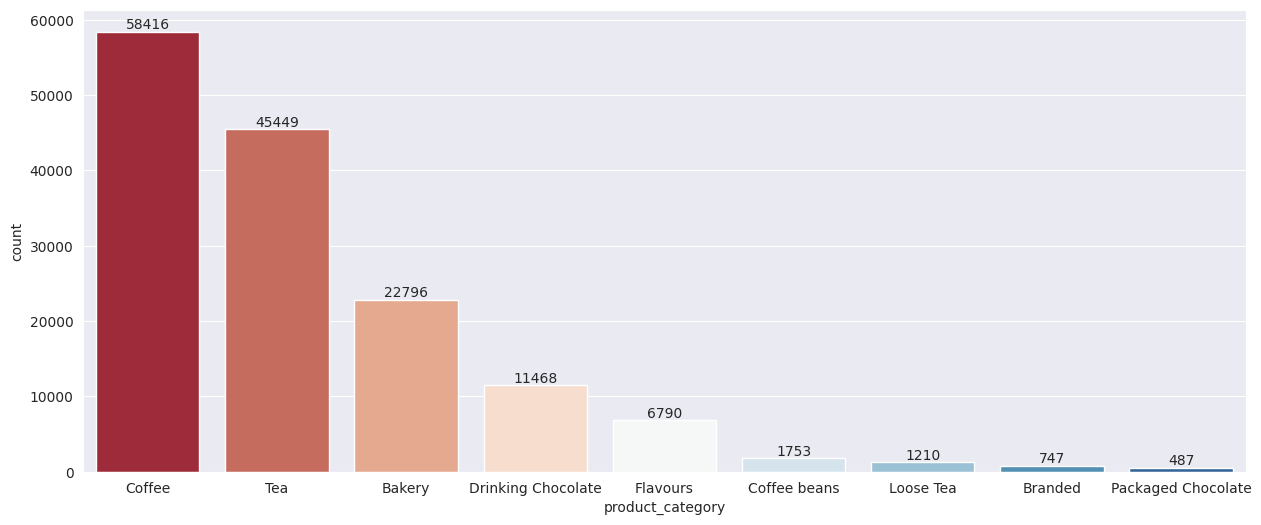

In [ ]:
# see most common category

# set figure size
plt.figure(figsize = (15,6))

# call function i create it in cell 12
count_plot(x_axis = "product_category")

We can see :

it's evident that the three stores offer a wide range of services.
Coffee stands as the best-selling product.
Tea also exhibits a high sales rate.

Discovering product_type column

In [ ]:
# see unique values

df["product_type"].unique()

array(['Gourmet brewed coffee', 'Brewed Chai tea', 'Hot chocolate',
       'Drip coffee', 'Scone', 'Barista Espresso', 'Brewed Black tea',
       'Brewed Green tea', 'Brewed herbal tea', 'Biscotti', 'Pastry',
       'Organic brewed coffee', 'Premium brewed coffee', 'Regular syrup',
       'Herbal tea', 'Gourmet Beans', 'Organic Beans', 'Sugar free syrup',
       'Drinking Chocolate', 'Premium Beans', 'Chai tea', 'Green beans',
       'Espresso Beans', 'Green tea', 'Organic Chocolate', 'Housewares',
       'Black tea', 'House blend Beans', 'Clothing'], dtype=object)

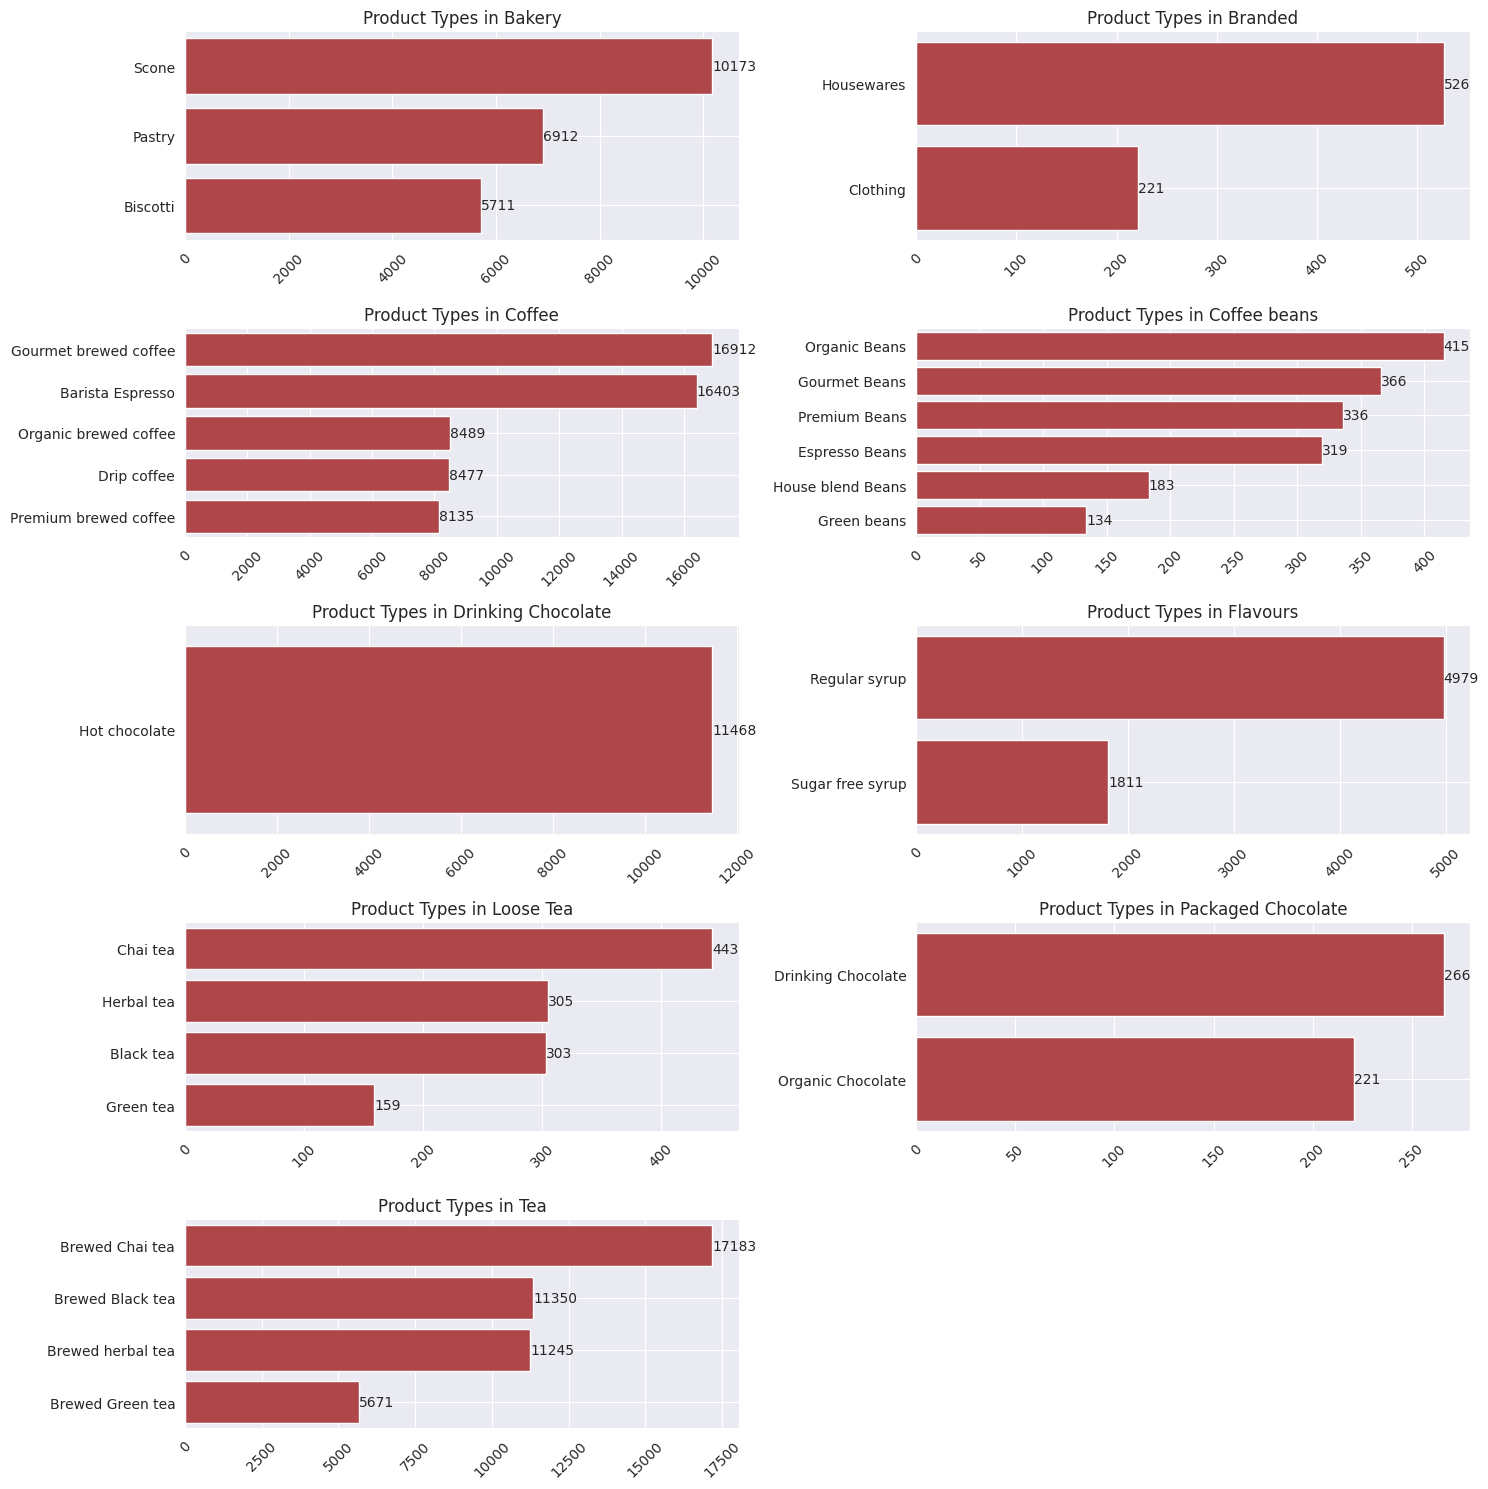

In [ ]:
# Assuming 'counts' is the DataFrame obtained from your groupby operation
counts = df.groupby(["product_category", "product_type"]).size().reset_index(name = "count")

# Get unique categories
categories = counts['product_category'].unique()

# Create subplots for each category in a 4x2 grid
fig, axes = plt.subplots(5, 2, figsize = (15, 15))

# Flatten the axes for easier iteration
axes = axes.flatten()

for i, category in enumerate(categories):
    # Filter data for each category
    subset = counts[counts['product_category'] == category]

    # Sort the data by 'count' column in descending order
    subset = subset.sort_values('count', ascending = False)

    # Create a bar plot for each category with sorted order
    sns.barplot(x = 'count', y = 'product_type', data = subset, ax = axes[i], order = subset['product_type'])
    axes[i].set_title(f'Product Types in {category}')
    axes[i].set_ylabel('')
    axes[i].set_xlabel('')
    axes[i].tick_params(axis = 'x', rotation = 45)
    axes[i].grid(True)

    # Adding bar labels
    for idx, bar in enumerate(axes[i].patches):
        axes[i].text(bar.get_width(), bar.get_y() + bar.get_height() / 2, subset.iloc[idx]['count'], ha = 'left', va = 'center')

# Hide extra subplots if there are fewer categories than subplots
for j in range(len(categories), len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

Discovering product_detail column

In [ ]:
# see unique values

df["product_detail"].unique()

array(['Ethiopia Rg', 'Spicy Eye Opener Chai Lg', 'Dark chocolate Lg',
       'Our Old Time Diner Blend Sm', 'Oatmeal Scone',
       'Columbian Medium Roast Sm', 'Latte Rg', 'Dark chocolate Rg',
       'Spicy Eye Opener Chai Rg', 'Ethiopia Lg', 'Earl Grey Lg',
       'Ouro Brasileiro shot', 'Serenity Green Tea Lg',
       'Jumbo Savory Scone', 'Lemon Grass Rg',
       'Sustainably Grown Organic Lg', 'Hazelnut Biscotti', 'Cappuccino',
       'Lemon Grass Lg', 'Chocolate Chip Biscotti', 'Peppermint Lg',
       'Chocolate Croissant', 'Latte', 'Brazilian Rg', 'Brazilian Lg',
       'Columbian Medium Roast Rg', 'Morning Sunrise Chai Rg',
       'Morning Sunrise Chai Lg', 'Our Old Time Diner Blend Lg',
       'Sustainably Grown Organic Rg', 'Scottish Cream Scone ',
       'Peppermint Rg', 'English Breakfast Rg',
       'Our Old Time Diner Blend Rg', 'Serenity Green Tea Rg',
       'Brazilian Sm', 'Jamaican Coffee River Sm',
       'Jamaican Coffee River Lg', 'Ginger Biscotti',
       'Tradit

I decided to Drop this column, it's redundant since the same information is presented more effectively in the other columns

In [ ]:
# drop column

df.drop(columns = "product_detail", inplace = True)

In [ ]:
# add new column revenue

df["Total revenue"] = df["transaction_qty"] * df["unit_price"]

In [ ]:
# see sample of data

df.sample(5)

,transaction_qty,store_location,unit_price,product_category,product_type,year,month,day,hour,Total revenue
36061,1,Astoria,2.50,Coffee,Gourmet brewed coffee,2023,March,Saturday,14,2.5
5529,1,Lower Manhattan,4.50,Bakery,Scone,2023,January,Wednesday,6,4.5
51139,1,Lower Manhattan,3.10,Tea,Brewed Chai tea,2023,March,Sunday,8,3.1
81385,2,Lower Manhattan,3.75,Coffee,Barista Espresso,2023,May,Tuesday,9,7.5
8212,1,Lower Manhattan,4.50,Bakery,Scone,2023,January,Sunday,10,4.5


Columns Insights
* Year, Sales exclusively from 2023.
* Month, Most sales within a six-month period
* Hour, Most sales were from 8 am to 11 pm
* Transaction quantity, Most sales were singles followed by 2 lots
* Stores, The sales rates of the three stores were similar, with the most significant difference observed at the Hell's Kitchen store
* Unit price, Price distribution is positively skewed, We understand from this that most Coffee have lower prices,while a few Coffee have higher prices
* Category :
 * it's evident that the three stores offer a wide range of services.
 * Coffee stands as the best-selling product.
 * Tea also exhibits a high sales rate.
* product type :
 * In the Bakery category, the most sold item is the scone
 * In the Branded category, the best-selling item is Housewares
 * In the Coffee category, the best-selling item is Gourmet brewed coffee
 * In the Coffee beans category, the best-selling item is Organic Beans
 * The Drinking Chocolate category solely offers hot chocolate
 * Regular syrup are the top-selling items in the Flavours category
 * In the Loose Tea category, the best-selling item is Chai tea
 * In the Packaged Chocolate category, the best-selling item is Drinking Chocolate
 * In the Tea category, the best-selling item is Brewed Chai tea

Bivariate Analysis & Visualizations

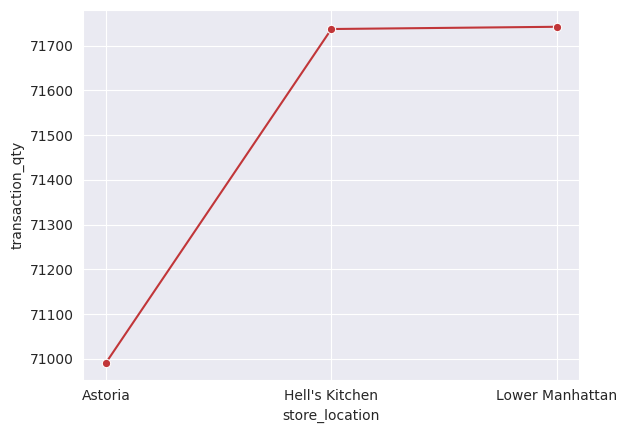

In [ ]:
# stores Vs transaction quantities

# Calculate sum of transaction quantities for each store_location
sum_transaction_qty = df.groupby("store_location")["transaction_qty"].sum().reset_index()

# create line plot
sns.lineplot(x = "store_location", y = "transaction_qty", data = sum_transaction_qty, marker = "o")
plt.show()

 We can see :

The sales ratios for quantities seem to be quite similar across all stores

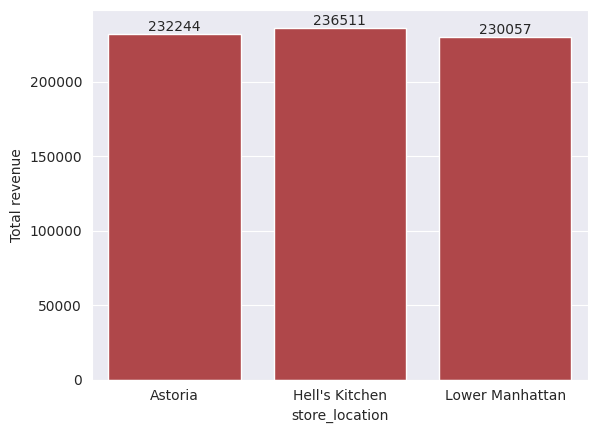

In [ ]:
# Stores Vs Total revenue

# Calculate total revenue for each store_location
revenue = df.groupby("store_location")["Total revenue"].sum().reset_index()

# create bar plot
ax = sns.barplot(x = "store_location", y = "Total revenue", data = revenue)

# Adding labels to each bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center',
                xytext = (0, 5), textcoords = 'offset points')

plt.show()

We can see :

The total revenue generated from sales at each store location amounted to 232,243.91 for Astoria 236,511.17 for Hell's Kitchen, and $230,057.25 for Lower Manhattan "Hell's Kitchen" appears to be the best store in terms of revenue.

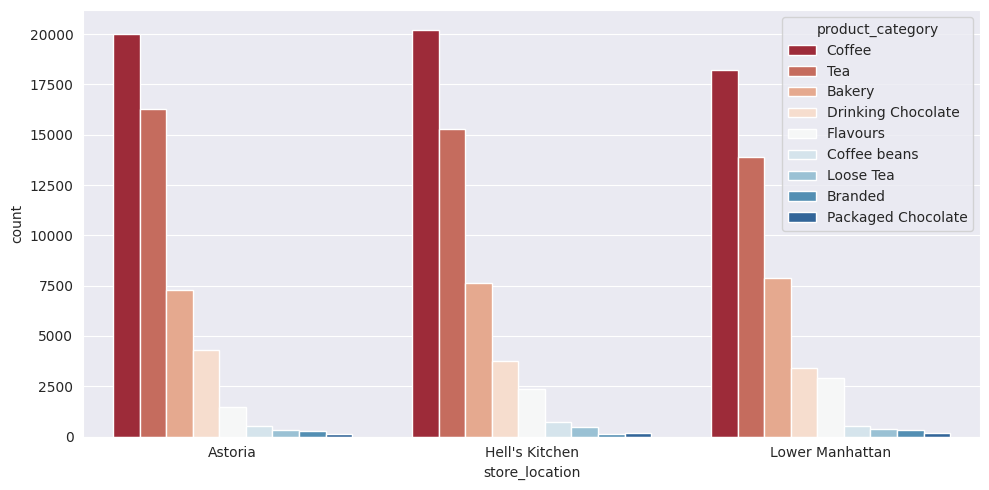

In [ ]:
# Stores VS product categories

# Calculate number of product categories at each store location
popular_products = df.groupby('store_location')[['product_category']].value_counts().reset_index(name='count')

# set figure size
plt.figure(figsize=(10, 5))

# Create a bar plot
sns.barplot(x = 'store_location', y = 'count', hue = 'product_category', data = popular_products, palette = "RdBu")

plt.tight_layout()
plt.show()

Astoria Store :

* The highest selling product category is Coffee with a count of 20,025 units
* Following Coffee, Tea stands as the second most popular category with a count of 16,260 units
* Other categories like Bakery, Drinking Chocolate, Flavours, Coffee beans, Loose Tea, Branded, and Packaged Chocolate have varying counts, ranging from 7289 to 110 units, in descending order


Hell's Kitchen Store :

* Similar to Astoria, Coffee leads in sales, amounting to 20,187 units
* Tea follows closely as the second most popular category with 15,277 units
* Other categories, such as Bakery, Drinking Chocolate, Flavours, Coffee beans, Loose Tea, Packaged Chocolate, Branded, and Packaged Chocolate, have counts ranging from 7617 to 119 units


Lower Manhattan Store :

* Coffee is again the top-selling category with 18,204 units
* Tea follows with 13,912 units
* Bakery, Drinking Chocolate, Flavours, Coffee beans, Loose Tea, Branded, Packaged Chocolate have counts ranging from 7890 to 180 units, in descending order

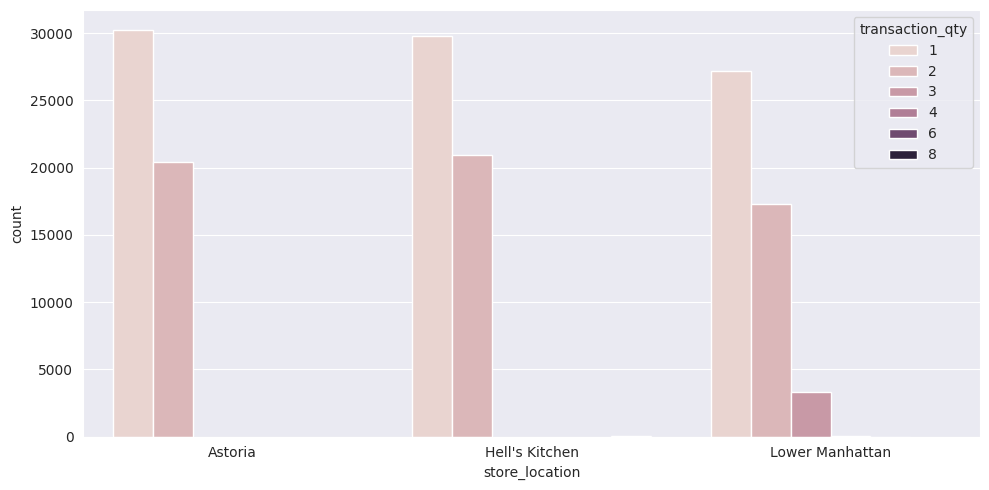

In [ ]:
# Stores VS Most transaction_qty

# grouped 'store_location' and 'transaction_qty' as columns
grouped_data = df.groupby("store_location")["transaction_qty"].value_counts().reset_index(name = "count")

# set figure size
plt.figure(figsize=(10, 5))

# Create bar plot
sns.barplot(x = "store_location", y = "count", hue = "transaction_qty", data = grouped_data)

plt.tight_layout()
plt.show()

Astoria Store :
* The most frequent transaction quantity observed is 1, with a count of 30,207 instances
* The second most frequent transaction quantity is 2, noted 20,392 times


Hell's Kitchen Store:
* The most frequent transaction quantity observed is 1, noted 29,793 times
* The second most frequent transaction quantity is 2, observed 20,932 times
* Additionally, there are 8 transactions with a quantity of 8


Lower Manhattan Store:
* The most frequent transaction quantity observed is 1, recorded 27,159 times.
* The second most frequent transaction quantity is 2, seen 17,318 times.
* There are occurrences of transaction quantities 3, 4, and 6, but they are less frequent compared to quantities 1 and 2

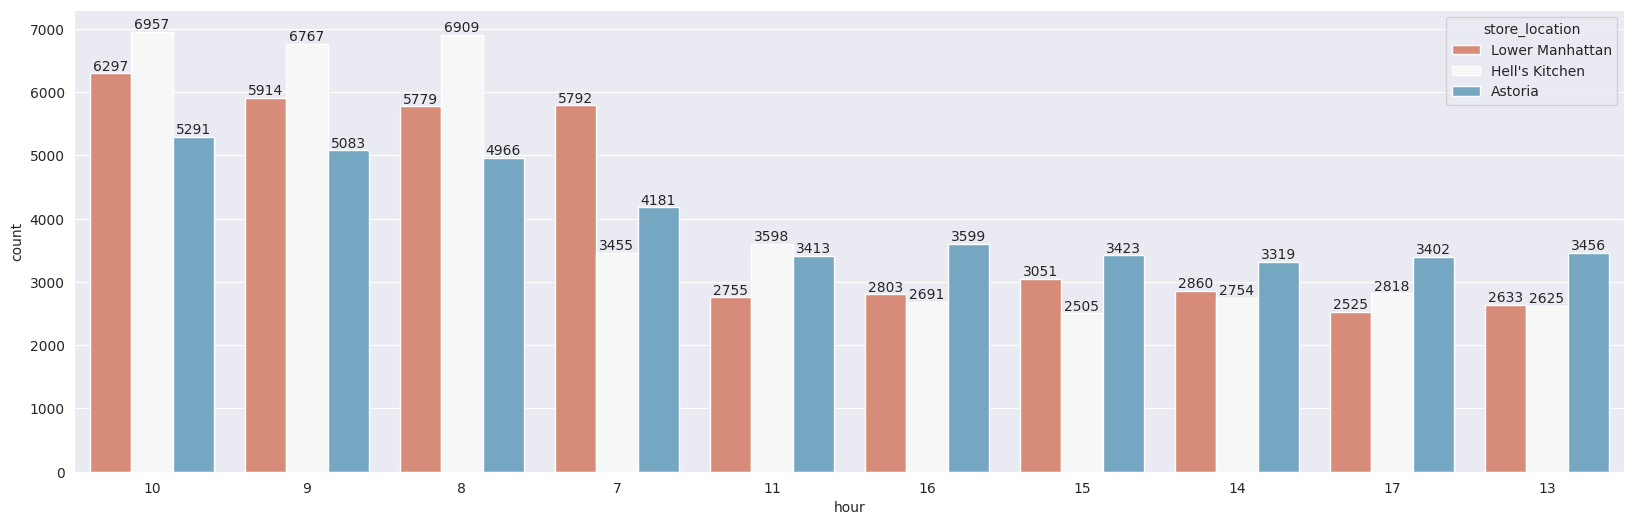

In [ ]:
# Stores VS Hour sales

# set figure size
plt.figure(figsize=(20, 6))

# call function i create it in cell 12
count_plot(x_axis = "hour", hue = "store_location", top = 10)

Astoria Store :

* peak hours are from 9 AM to 10 AM, and from 4 PM to 5 PM, with counts ranging between 5,083 and 5,291 during these periods
* The least busy hours are from 7 AM to 8 AM, with counts ranging between 4,181 and 4,966


Hell's Kitchen Store :
* Busiest hours are from 8 AM to 10 AM, with counts ranging between 6,767 and 6,909
* The least busy hours are from 6 AM to 7 AM and from 6 PM to 8 PM


Lower Manhattan Store :
* Peak hours are from 9 AM to 10 AM, with a count of 6,297, and from 2 PM to 3 PM, with a count of 3,051
* The least busy hours are from 7 PM to 8 PM, with counts dropping to 75 and 125

<ipython-input-82-93bcf92be53b>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = "product_type", y = "revenue", data = category_revenue, palette = "RdBu")


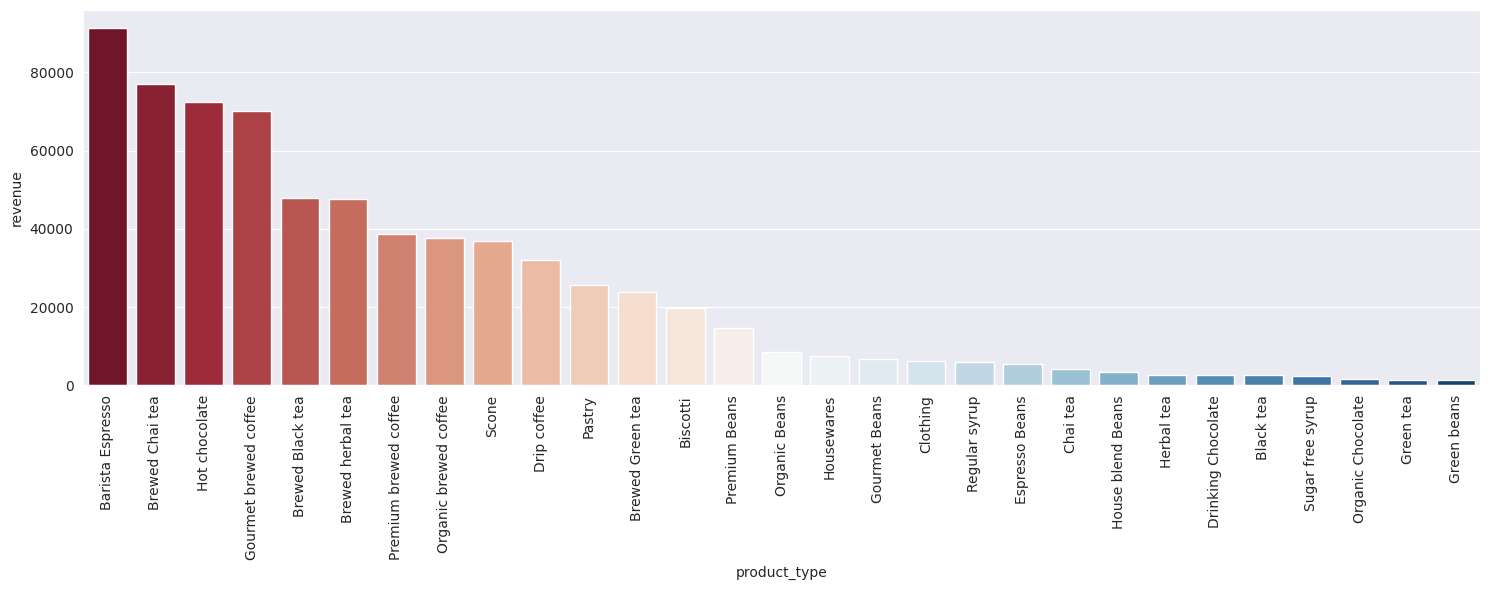

In [ ]:
# Category VS Total revenue

# grouped product_type' and 'Total revenue'
category_revenue = df.groupby("product_type")["Total revenue"].sum().reset_index(name = "revenue")

# sort category by revenue
category_revenue = category_revenue.sort_values(by = 'revenue', ascending = False)

# set figure size
plt.figure(figsize = (15,6))

# create bar plot
sns.barplot(x = "product_type", y = "revenue", data = category_revenue, palette = "RdBu")

# set x-axis rotation
plt.xticks(rotation = 90)

plt.tight_layout()
plt.show()

Top Revenue Product Types :
* Barista Espresso with a revenue of 91,406.20
* Brewed Chai tea with a revenue of 77,081.95
* Hot chocolate with a revenue of 72,416.00
* Gourmet brewed coffee with a revenue of 70,034.60
* Brewed Black tea with a revenue of 47,932.00


Lowest Revenue Product Types :
* Organic Chocolate with a revenue of 1,679.60
* Green tea with a revenue of 1,470.75
* Green beans with a revenue of 1,340.00


Other Observations :
* Various products contribute to revenue across different ranges, with a mix of beverages (like teas, coffees) and snacks (biscotti, pastries).
* Coffee-related products, such as various brews and espresso variants, hold prominent positions in revenue generation.
The lowest revenue-generating products are predominantly related to tea and specific beverage variants.

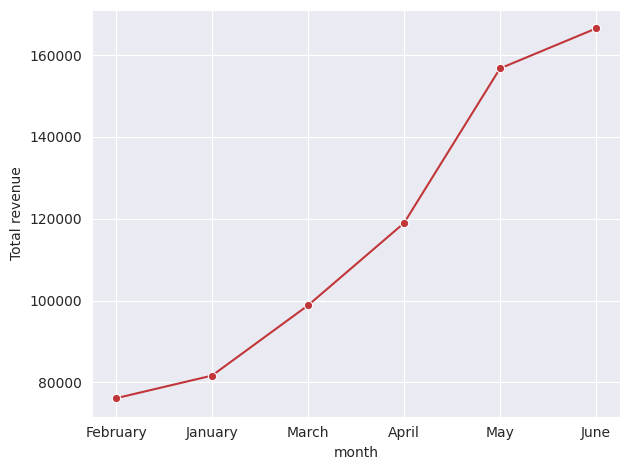

In [ ]:
# Month VS revenue

# Grouping by month and summing the revenue
monthly_revenue  = df.groupby("month")["Total revenue"].sum().reset_index().sort_values(by = "Total revenue")

# create line plot
sns.lineplot(x = "month", y = "Total revenue", data = monthly_revenue , marker = "o")

plt.tight_layout()
plt.show()

We can see:
* June had the highest total revenue, reaching 166,485.88, making it the most profitable month.
* May followed closely behind with a total revenue of 156,727.76, indicating strong performance.
* April and March also performed well, generating revenues of 118,941.08 and 98,834.68, respectively.
* January and February had comparatively lower revenue figures at 81,677.74 and 76,145.19, respectively.

In [ ]:
df.head()

,transaction_qty,store_location,unit_price,product_category,product_type,year,month,day,hour,Total revenue
0,2,Lower Manhattan,3.0,Coffee,Gourmet brewed coffee,2023,January,Sunday,7,6.0
1,2,Lower Manhattan,3.1,Tea,Brewed Chai tea,2023,January,Sunday,7,6.2
2,2,Lower Manhattan,4.5,Drinking Chocolate,Hot chocolate,2023,January,Sunday,7,9.0
3,1,Lower Manhattan,2.0,Coffee,Drip coffee,2023,January,Sunday,7,2.0
4,2,Lower Manhattan,3.1,Tea,Brewed Chai tea,2023,January,Sunday,7,6.2


In [ ]:
# Group the data by Product Name and sum up the sales by product
product_group = df.groupby(["product_category"]).sum()["Total revenue"]
product_group

,Total revenue
product_category,
Bakery,82315.64
Branded,13607.00
Coffee,269952.45
Coffee beans,40085.25
Drinking Chocolate,72416.00
Flavours,8408.80
Loose Tea,11213.60
Packaged Chocolate,4407.64
Tea,196405.95
